# Title: Exercise 7.1
Name: Sanjay



### Exercise 7.1
 <p>Using data from the NSFG, make a scatter plot of birth weight
    versus mother’s age. Plot percentiles of birth weight versus mother’s age.
    Compute Pearson’s and Spearman’s correlations. How would you character-
    ize the relationship between these variables</p>



### Import Libraries

In [1]:
import numpy as np
from IPython.display import set_matplotlib_formats
from matplotlib import pyplot as plt

import nsfg
import thinkplot
import thinkstats2

%matplotlib inline

set_matplotlib_formats("png", "pdf")

### Get data for scatter plot

In [2]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
# Drop rows with NAN values
live = live.dropna(subset=["agepreg", "totalwgt_lb"])

### Plot Scatter Plot

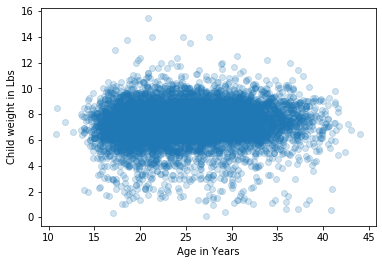

In [3]:
ages = live["agepreg"]
weights = live["totalwgt_lb"]

plt.scatter(ages, weights, alpha=0.2)
plt.xlabel("Age in Years")
plt.ylabel("Child weight in Lbs")
plt.show()

## Plot percentiles of birth weight versus mother’s age.



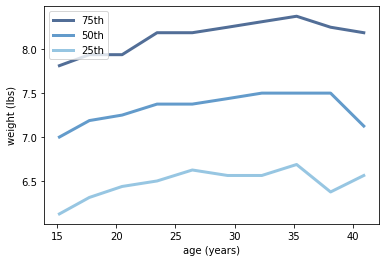

<Figure size 576x432 with 0 Axes>

In [4]:
bins = np.arange(10, 45, 3)

indices = np.digitize(live.agepreg, bins)
groups = live.groupby(indices)
ages_Bins = [group.agepreg.mean() for i, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

thinkplot.Config(xlabel="age (years)", ylabel="weight (lbs)", legend=True)

thinkplot.PrePlot(3)
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = "%dth" % percent
    thinkplot.Plot(ages_Bins, weights, label=label)

thinkplot.show()

### Compute Pearson’s and Spearman’s correlations

In [5]:
corArray = np.corrcoef(live.agepreg, live.totalwgt_lb)
print("Pearson's correlation:", corArray[0, 1])

age_ranked = live.agepreg.rank()
weight_ranked = live.totalwgt_lb.rank()

corArray = np.corrcoef(age_ranked, weight_ranked)
print("Spearman's correlation:", corArray[0, 1])

Pearson's correlation: 0.06883397035410904
Spearman's correlation: 0.09461004109658228


As Spearman and Pearson correlations are positive We can say age of mother at is having small positive effect on weight of the child.   

